In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

数据可视化的目的：
* 探索数据
* 沟通

Figure -> Axes -> (Line2D,Text,etc)一个Figure对象可以包含多个子视图（Axes），在matplotlib中用Axes对象表示一个绘图区域，可以理解为子图。

## pyplot初步

Text(0.5,0,'Years')

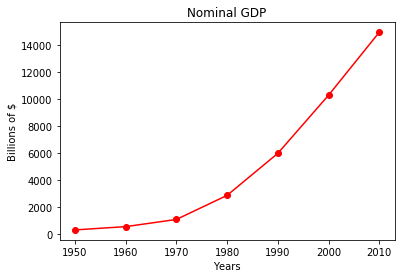

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000,2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='red', marker='o',linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.xlabel('Years')

([<matplotlib.axis.XTick at 0x1116fb0f0>,
 <a list of 5 Text xticklabel objects>)

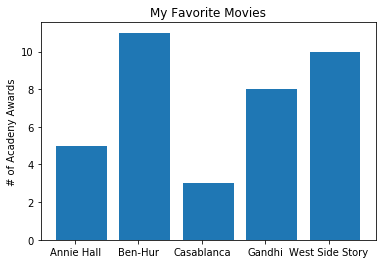

In [8]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi', 'West Side Story']
num_oscars = [5, 11, 3, 8, 10]

xs = [i + 0.1 for i,_ in enumerate(movies)]   # 这个地方是绘画的起始的位置！（定位tick的起始位置）

plt.bar(xs, num_oscars)

plt.ylabel('# of Acadeny Awards')
plt.title('My Favorite Movies')

# 下面是在定制显示的位置。
plt.xticks([i for i,_ in enumerate(movies)], movies)   # 在哪个位置画的一个个的点，i是tick的位置。

> `plt`的 **`legend`** 是指定显示我们在 **`plot`** 函数中设置的 **`label`** 的内容，其中的 **`loc`** 的值试试指定显示的位置！！

Text(0.5,1,'The Bias-Variance Tradeoff')

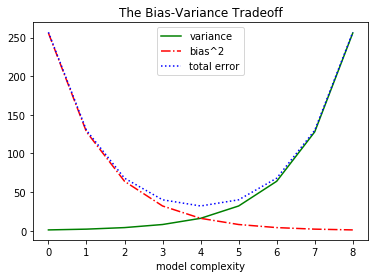

In [11]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i,_ in enumerate(variance)]

plt.plot(xs, variance,     'g-', label="variance")   # green solid line
plt.plot(xs, bias_squared, 'r-.', label="bias^2")     # red dot-dashed line
plt.plot(xs, total_error,  'b:', label="total error")# blue dotted line

# loc=9 means 'top center'
plt.legend(loc=9)   # 这个好像的意思是label这些东西的显示的位置。
plt.xlabel('model complexity')
plt.title('The Bias-Variance Tradeoff')

In [12]:
plt.legend?

Text(0,0.5,'daily minutes spent on the site')

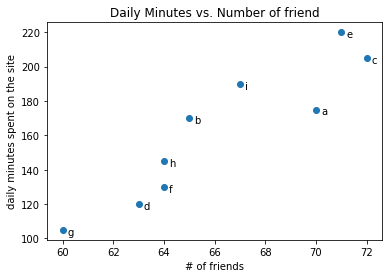

In [13]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, 
                xy=(friend_count, minute_count),    # put the label with its point
                xytext=(5, -5),                     # but slightly offset
                textcoords='offset points')
plt.title('Daily Minutes vs. Number of friend')
plt.xlabel('# of friends')
plt.ylabel('daily minutes spent on the site')

In [14]:
zip?

### matplotlib各种绘图参数
[https://github.com/rougier/matplotlib-tutorial](https://github.com/rougier/matplotlib-tutorial)

In [16]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S=np.cos(X), np.sin(X)

> 在``figure``方法里面的参数中``figsize``**是指具体的axes的大小**，而参数``dpi``是指打印的时候，一个英寸里面有多少个点！！

([<matplotlib.axis.YTick at 0x1140ee6d8>,
 <a list of 5 Text yticklabel objects>)

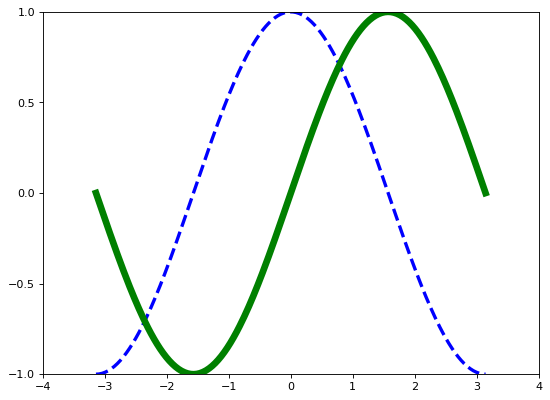

In [17]:
plt.figure(figsize=(8, 6), dpi=80)

# color, linewidth(pixels), linestyle
plt.plot(X, C, color='blue', linewidth=3.0, linestyle='--')

plt.plot(X, S, color='green', linewidth=6.0, linestyle='-')

# x limits
plt.xlim(-4.0, 4.0)

# x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# y limits
plt.ylim(-1.0, 1.0)

# y ticks
plt.yticks(np.linspace(-1, 1, 5 ,endpoint=True))

([<matplotlib.axis.YTick at 0x114a4f630>,
 <a list of 3 Text yticklabel objects>)

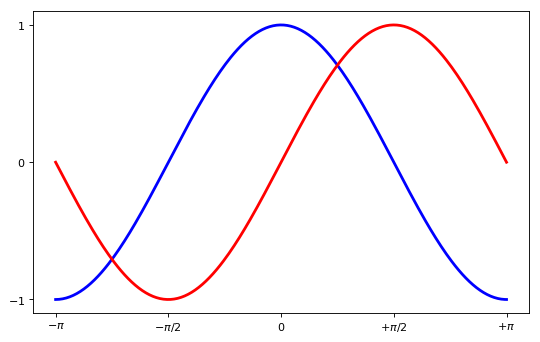

In [18]:
plt.figure(figsize=(8, 5), dpi=80),
plt.subplot(111)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, color='blue', linewidth=2.5, linestyle='-')
plt.plot(X, S, color='red', linewidth=2.5, linestyle='-')

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 0, 1],[r'$-1$', r'$0$', r'$1$'])    # 看来这些地方用到了类似特殊的输入方式。这个地方式Lantx语法。

> ### 下面将演示如何对坐标轴整个框架进行调整
绘图的整个框实际上叫做**spines** !

([<matplotlib.axis.YTick at 0x1149af8d0>,
 <a list of 3 Text yticklabel objects>)

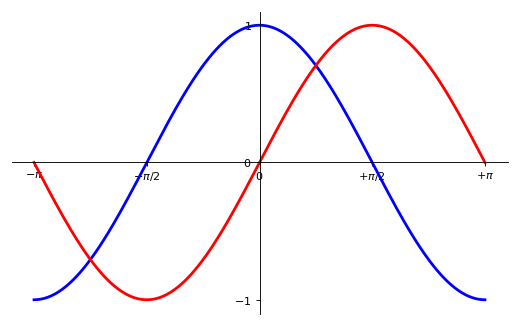

In [19]:
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# 下面是对整个绘图框架和坐标系进行调整
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color='blue', linewidth=2.5, linestyle='-')
plt.plot(X, S, color='red', linewidth=2.5, linestyle='-')

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 0, 1],[r'$-1$', r'$0$', r'$1$'])    # 看来这些地方用到了类似特殊的输入方式。这个地方式Lantx语法。

> 在使用**`legend`** 进行lable的绘制的时候，我们首先需要关注绘图的时候，是否使用了 **`label`** 这个属性，然后再看 **`loc`** 这个参数来指定显示的位置，而且还可以调用 **`frameon`** 这个参数来指定是否显示那个边框。

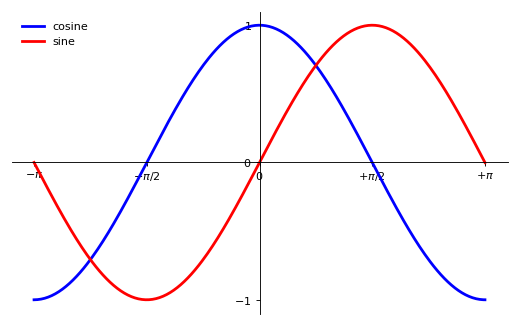

In [23]:
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# 下面是对整个绘图框架和坐标系进行调整
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plt.plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 0, 1],[r'$-1$', r'$0$', r'$1$'])    # 看来这些地方用到了类似特殊的输入方式。这个地方式Lantx语法。

plt.legend(loc='upper left', frameon=False)

> 下面来演示如何添加说明

> 在使用 **ˋannotateˋ** 做标注的时候，第一个参数是显示的内容，通常这个字符串前面加个 **ˋrˋ** 来表示原始字符串，第二个参数 **ˋxyˋ** 表示写注释的位置，接下来的参数 **ˋxytextˋ** 里面的两个数值x对应的负数表示往左边移，正数表示往右边移，而y对应的负数表示往下边移，整数表示往上边移。显示的箭头是通过参数 **ˋarrowpropsˋ** 来进行设定的，其中的 **ˋarrowstyleˋ** 表示箭头的样式，而 **ˋconnectionstyleˋ** 则进行制定连接的方式。 **ˋarc3ˋ** 表示是圆弧，而 **ˋrad=.2ˋ** 表示圆弧的半径。

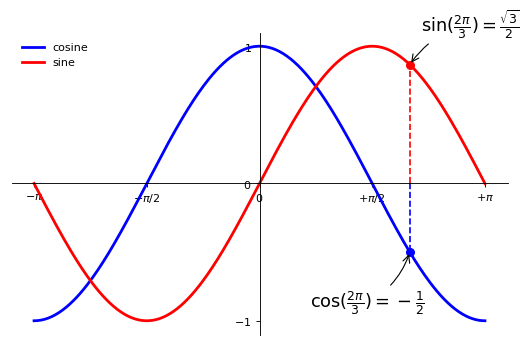

In [2]:
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# 下面是对整个绘图框架和坐标系进行调整
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plt.plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 0, 1],[r'$-1$', r'$0$', r'$1$'])    # 看来这些地方用到了类似特殊的输入方式。这个地方式Lantx语法。

t = 2*np.pi/3
plt.plot([t,t], [0, np.cos(t)],
         color='blue', linewidth=1.5, linestyle='--')
plt.scatter([t,], [np.cos(t),], 50, color='blue')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$', 
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-90, -50), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t], [0, np.sin(t)], color='red', linewidth=1.5, linestyle='--')
plt.scatter([t,], [np.sin(t),], 50, color='red')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10,+30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)
# plt.savefig('./data/myplot.png', dpi=72) # 来把图片保存下来。

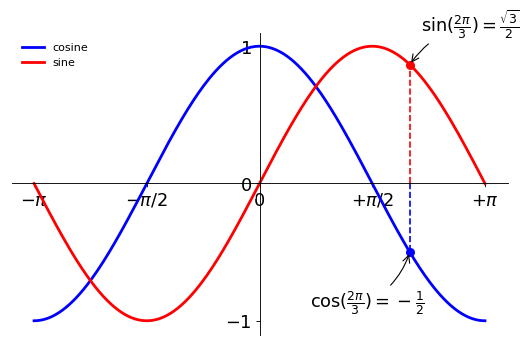

In [6]:
plt.figure(figsize=(8, 5), dpi=80)
ax = plt.subplot(111)

# 下面是对整个绘图框架和坐标系进行调整
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plt.plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.yticks([-1, 0, 1],[r'$-1$', r'$0$', r'$1$'])    # 看来这些地方用到了类似特殊的输入方式。这个地方式Lantx语法。

t = 2*np.pi/3
plt.plot([t,t], [0, np.cos(t)],
         color='blue', linewidth=1.5, linestyle='--')
plt.scatter([t,], [np.cos(t),], 50, color='blue')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$', 
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-90, -50), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t], [0, np.sin(t)], color='red', linewidth=1.5, linestyle='--')
plt.scatter([t,], [np.sin(t),], 50, color='red')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10,+30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)

# 下面首先获取了所有label，然后对他们分别进行设置。
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

# plt.savefig('./data/myplot.png', dpi=72) # 来把图片保存下来。

In [7]:
label.set_bbox?

(-1.25, 1.25)

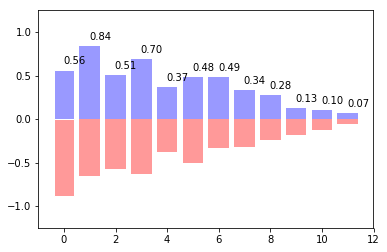

In [8]:
n = 12
X = np.arange(n)
Y1 = (1- X/float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1- X/float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

In [9]:
plt.bar?

[]

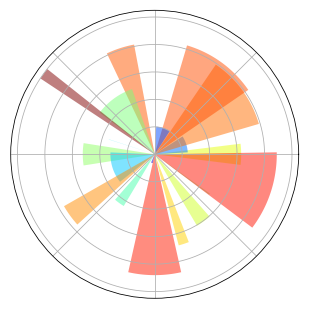

In [10]:
ax = plt.axes([0,0,1,1], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])